In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import os
from Poincare import *
from Poincare import Section
import math
from surface_dynamics.all import *
from time import time

In [2]:
#Code from Sunrose
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [3]:
def vectors(perm, length = 200):
    a = str(perm)
    h, v = a.split("\n")
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    sc_list = T.saddle_connections(length)
    slopes_all = []
    for item in sc_list:
        vec = item.holonomy().n()
        direction = item.direction
        if vec not in slopes_all:
            if vec[0] >= -length/20 and vec[0] <= length/20:
                if vec[1] >= -length/20 and vec[1] <= length/20:
                    slopes_all.append(item.holonomy().n())         
    vecs = []
    for vec in slopes_all:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    return vecs

In [4]:
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [5]:
permutations = perms_list(7)
len(permutations)

92

In [6]:
permutations[4]

(1)(2)(3)(4,5,6,7)
(1,2,3,4)(5)(6)(7)

In [ ]:
for i in range(4, len(permutations)):
    vecs = None
    n_squares = 7
    perm = permutations[i]
    vecs = vectors(perm,30000)
    try:
        comp(perm, vecs, 7, i)
    except:
        continue

[Infinity, 13/8, 9/5, 148/79, 8/5, 43/23, 2, 15/8, 5/3, 17/9]
10
[[1]
 [0]]
[[1.        ]
 [0.61538462]]
[[1.        ]
 [0.55555556]]
[[1.        ]
 [0.53378378]]
[[1.   ]
 [0.625]]
[[1.        ]
 [0.53488372]]
[[1. ]
 [0.5]]
[[1.        ]
 [0.53333333]]
[[1. ]
 [0.6]]
[[1.        ]
 [0.52941176]]

alpha = 4.0
53760
26878
7

alpha = 466.0
53760
26880
empty section

alpha = 106.0
53760
26880
1

alpha = 56290.0
53760
26880
empty section

alpha = 534.0
53760
26880
empty section

alpha = 7134.0
53760
26880
empty section

alpha = 50.0
53760
26880
1

alpha = 3468.0
53760
26880
empty section

alpha = 238.0
53760
26880
empty section

alpha = 2590.0
53760
26880
empty section
[Infinity, 35/74, 4/5, 1/3, 9/19, 8/17, 1, 1/2, 6/7, 0]
10
[[1]
 [0]]
[[1.        ]
 [2.11428571]]
[[1.  ]
 [1.25]]
[[1]
 [3]]
[[1.        ]
 [2.11111111]]
[[1.   ]
 [2.125]]
[[1]
 [1]]
[[1]
 [2]]
[[1.        ]
 [1.16666667]]
[[0]
 [1]]

alpha = 4.0
53946
26971
7

alpha = 13402.0
53946
26973
empty section

alpha = 41.0
5394

In [7]:
perm = permutations[4]
vecs0 = vectors(perm, 4000)
dx = 0.001
f = open("vecs.txt",'w')
f.write(str(vecs0))
f.close()

In [8]:
f = open("vecs.txt",'r')
vecs0 = eval(f.readlines()[0])
f.close()

In [9]:
len(vecs0)

7112

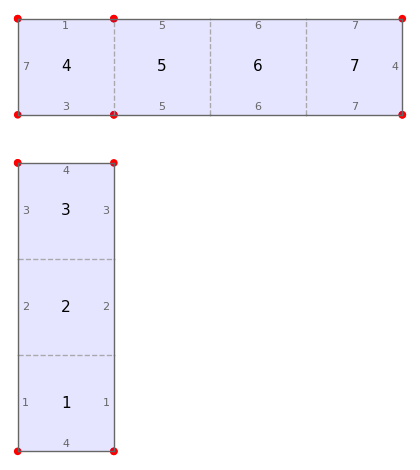

In [18]:
for i in range(20):
    try:
        alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
        break
    except:
        continue
perm.show()

In [10]:
perm = permutations[4]
dx = 0.001
alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)


0.2679491924311227? 3.732050807568878?
[ 4 -1]
[ 1  0]


ValueError: Different eigenvalues

In [10]:
alphas

NameError: name 'alphas' is not defined

In [ ]:
alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs

In [15]:
i = 2
n_squares = 7
index = 0
vecs, x_vals, m0, m1, x0, y0, dx_y = setup(alphas[i], Cs[i], eigs[i], vecs0, dx)
t1 = time()
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
t2 = time()
print(t2-t1)

11110
5555


ValueError: No winner

In [ ]:
plot(df, vecs, Cs[i], 1, n_squares, index, test = True)

In [ ]:
sec_list = sec_setup(df, dx_y)
secs = sec_comp(sec_list, dx)
times = time_comp(secs)
pdf(list(df["time"]), times, dx)

In [9]:
54 * 2*math.pi**(2/3)

231.66317488799075

In [15]:
df[df["lab"] != 0]

,x,y,lab,vec,time


In [12]:
df

,x,y,lab,vec,time
0,0.002,2.251586e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",2.216215e-04
1,0.003,2.249328e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.477478e-04
2,0.003,2.249330e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.477477e-04
3,0.004,2.247070e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.108110e-04
4,0.004,2.247072e+06,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",1.108109e-04
...,...,...,...,...,...
497868,0.999,2.250316e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436884e-07
497869,0.999,2.252352e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436880e-07
497870,0.999,2.254388e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436876e-07
497871,0.999,2.256424e+03,0,"[[0.9999980497281841], [4.4324268547862866e-07]]",4.436872e-07


In [20]:
a = np.array([[2],[3]])
b = None
if type(a) == type(None):
    print(1)

In [16]:
type(b)

<class 'NoneType'>

AttributeError: 'EvenArithmeticSubgroup_Permutation_with_category' object has no attribute '__mro__'

In [24]:
v = perm.veech_group()

In [26]:
v.genus()

Arithmetic subgroup of index 54

In [9]:
prev_cusps = []
for i in range(20):
    v = perm.veech_group() # the problem is here!
    a = v._find_cusps()
    if not str(a) in prev_cusps:
        prev_cusps.append(str(a))
        print(str(a))

[Infinity, 59/40, 9/5, 4/3, 16/11, 25/17, 2, 3/2, 31/21, 3]
[Infinity, 93/34, 53/19, 8/3, 52/19, 63/23, 14/5, 11/4, 41/15, 3]
[Infinity, 74/93, 125/157, 3/4, 35/44, 31/39, 43/54, 4/5, 39/49, 1]
[Infinity, 8/13, 5/11, 3/4, 5/8, 7/11, 1/2, 2/3, 13/21, 1]
[Infinity, 50/27, 9/5, 8/3, 28/19, 25/17, 2, 3/2, 13/7, 3]
[Infinity, 13/8, 9/5, 4/3, 8/5, 25/17, 2, 3/2, 5/3, 1]
[Infinity, 69/28, 9/5, 8/3, 32/13, 27/11, 2, 5/2, 37/15, 3]
[Infinity, 109/74, 9/5, 8/3, 28/19, 19/13, 2, 3/2, 31/21, 3]
[Infinity, 41/22, 9/5, 148/79, 28/15, 125/67, 2, 15/8, 5/3, 3]
[Infinity, 34/43, 125/157, 3/4, 19/24, 31/39, 43/54, 4/5, 53/67, 1]
[Infinity, 30/13, 121/49, 52/21, 37/16, 27/11, 42/17, 5/2, 7/3, 3]
[Infinity, 28/43, 49/75, 3/4, 5/8, 11/17, 17/26, 2/3, 15/23, 1]
[Infinity, 50/77, 5/11, 3/4, 13/20, 7/11, 1/2, 2/3, 37/57, 1]
[Infinity, 123/50, 9/5, 52/21, 32/13, 17/7, 2, 5/2, 5/3, 3]
[Infinity, 30/13, 9/5, 8/3, 12/5, 17/7, 2, 5/2, 7/3, 3]
[Infinity, 13/8, 9/5, 8/3, 12/5, 55/23, 2, 5/2, 5/3, 3]
[Infinity, 35/22

In [10]:
prev_cusps = []
v = perm.veech_group()
for i in range(20):
    a = v.cusps()
    if not str(a) in prev_cusps:
        prev_cusps.append(str(a))
        print(str(a))

[Infinity, 50/27, 9/5, 3/4, 13/20, 11/17, 2, 2/3, 13/7, 1]


In [12]:
v.are_equivalent(662/405, 32/17)

True

In [20]:
perm.veech_group??

Error getting source: s must be a string


Docstring:     
        Return the Veech group of this origami.

        EXAMPLES::

            sage: from surface_dynamics.all import Origami
            sage: o = Origami('(1,2)', '(1,3)')
            sage: G = o.veech_group()
            sage: G
            Arithmetic subgroup with permutations of right cosets
             S2=(2,3)
             S3=(1,2,3)
             L=(1,2)
             R=(1,3)

        Most geometric information on the quotient of the upper half plane by
        the Veech group can be recovered from "G"::

            sage: G.index()
            3
            sage: G.genus()
            0
            sage: G.ncusps()
            2
            sage: G.nu2()
            1
            sage: G.nu3()
            0

        As well as some arithmetic informations::

            sage: G.is_congruence()
            True
            sage: G.generalised_level()
            2

        Note that the fact of being congruent is rather exceptional::

            sage: o = Orig

In [21]:
type(perm)

<class 'surface_dynamics.flat_surfaces.origamis.origami_dense.Origami_dense_pyx'>

In [23]:
perm.teichmueller_curve()

Teichmueller curve of the origami
(1)(2)(3)(4,5,6,7)
(1,2,3,4)(5)(6)(7)

In [18]:
v = perm.veech_group()
m = v.generators()
a = m[0].matrix()
a.trace()

0

In [ ]:
v = perm.veech_group()
a = v.cusps()
b = 